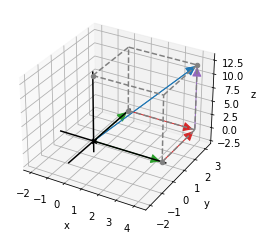

In [1]:
import sys
sys.path.insert(0,'..')
from draw3d import *
from draw2d import *
from vectors import *


def add(*vectors):
    return tuple(map(sum,zip(*vectors)))
def scalar(*vectors, scalar):
    return [(x*scalar,y*scalar,x*scalar) for (x,y,x) in vectors]
def sub(*vectors):
    min_vectors = [(x*-1,y*-1,z*-1) for (x,y,z) in vectors[1:]] 
    min_vectors.insert(0, vectors[0])
    return tuple(map(sum,zip(*min_vectors)))


point = (4,3,12)
x_component = (point[0],0,0) 
y_component = (0,point[1],0)
z_component = (0,0,point[2])
x_y_component = add(*[x_component,y_component])


draw3d(
    Points3D(*[point, x_component, y_component, z_component], color=gray),
    Arrow3D(point, color=blue),
    Arrow3D(x_component, color=green),
    Arrow3D(y_component, color=green),
    Arrow3D(x_y_component, tail=y_component, color=red),
    Arrow3D(x_y_component, tail=x_component, color=red),
    Arrow3D(point, tail=x_y_component, color=purple),
    Arrow3D(point, color=blue),
    Box3D(*point)
)

In [ ]:
from math import *

point=(3,4,2)
point_x=(point[0],0,0)
point_y=(0,point[1],0)
point_z=(0,0,point[2])
point_x_y = add(*[point_x, point_y])

draw3d(
    Points3D(point),
    Arrow3D(point),
    Arrow3D(point_x_y, color=green),
    Box3D(*point_x_y),
    Box3D(*point),
    annotations=([
        ("ϕ (phi)", point_x_y[0] - 1, point_x_y[1] - 3, point_x_y[2]),
        ("θ (theta)", 0, point[1] - 2, point[2] - 1)
    ])
)


print("length + ϕ (phi) + θ (theta) = description of 3d vector = speherical coordinates")

# angles where super useful in 2d when we wanted to rotate object 
# we would simply convert cartesians to polar add the angle and then convert back to cartesian
def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length*cos(angle), length*sin(angle))
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return (length(vector), angle)

# it is possible to achieve a similar result in 3d but the z-axis rotation is more complex
# instead we will use vector products for this.

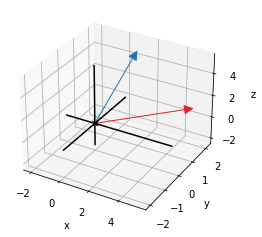

In [7]:
u = (5,2,1)
def linear_combination(scalars, *vectors):
    scaled = [scale(s, v) for s, v in zip(scalars, vectors)]  # [(3, (0,0,1)),(-2, (2,1,0)),(5, (1,0,-1))] => [3 * (0,0,1), -2 * (2,1,0), 5 * (1,0,-1)]
    return add(*scaled)

def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *zip(*matrix))

u_transform = multiply_matrix_vector(
    ((0, 0, 1),
    (0, 1, 0),
    (1, 0, 0)), 
    u
)
draw3d(
    Arrow3D(u, color=red),
    Arrow3D(u_transform, color=blue),
);